# Biofourmis Accelerometer Data Test

## Fatma Uyar Morency
**March 17 2019**

### Vital Connect Patch accelerometer data exploration

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

In [2]:
df1=pd.read_csv('Example1.csv')
df1['TS']=pd.to_datetime(df1['Time'], unit='ms')
df1.head()

,Time,accel_x,accel_y,accel_z,TS
0,1504814089741,-848,-472,360,2017-09-07 19:54:49.741
1,1504814089761,-856,-480,360,2017-09-07 19:54:49.761
2,1504814089781,-848,-472,360,2017-09-07 19:54:49.781
3,1504814089801,-856,-464,368,2017-09-07 19:54:49.801
4,1504814089821,-848,-464,360,2017-09-07 19:54:49.821


In [3]:
df2=pd.read_csv('Example2.csv')
df2['TS']=pd.to_datetime(df2['Time'], unit='ms')
df2.head()

,Time,accel_x,accel_y,accel_z,TS
0,1521644118075,-1024,232,512,2018-03-21 14:55:18.075
1,1521644118096,-960,128,368,2018-03-21 14:55:18.096
2,1521644118116,-936,64,312,2018-03-21 14:55:18.116
3,1521644118136,-944,64,384,2018-03-21 14:55:18.136
4,1521644118156,-952,80,440,2018-03-21 14:55:18.156


from the [TS] Time stamp column, we can say that these two data files were collected almost 6 months apart. Lets check the duration of data collection times for each participant data:

In [4]:
print(df1.TS.iloc[0])
print(df1.TS.iloc[-1])

2017-09-07 19:54:49.741000
2017-09-09 13:46:12.853000


In [5]:
print(df2.TS.iloc[0])
print(df2.TS.iloc[-1])

2018-03-21 14:55:18.075000
2018-03-22 14:30:46.649000


**Accelerometer Data measurement units**  
Following the Chan 2013 paper listed under from Vital Connect [resources](https://vitalconnect.com/newsroom/resources/publications/) webpage, I found the following specs for the sensor patch:

"A tri-axial accelerometer is present within the electronics module that allows for the recording of accelerations within the range of ±4 g per axis with a resolution of 0.0078 g, where g = 9.81 m/s2 is the gravitational acceleration."

Since the accel_x,accel_x,accel_x values are multiples of 8 following the device resolution, I assumed these columns are acceleration measures in mg unit, to convert it to g, I divided them by 1000. 

In [6]:
df1['accel_x']=df1['accel_x']/1000
df1['accel_y']=df1['accel_y']/1000
df1['accel_z']=df1['accel_z']/1000
df1.head()

,Time,accel_x,accel_y,accel_z,TS
0,1504814089741,-0.848,-0.472,0.360,2017-09-07 19:54:49.741
1,1504814089761,-0.856,-0.480,0.360,2017-09-07 19:54:49.761
2,1504814089781,-0.848,-0.472,0.360,2017-09-07 19:54:49.781
3,1504814089801,-0.856,-0.464,0.368,2017-09-07 19:54:49.801
4,1504814089821,-0.848,-0.464,0.360,2017-09-07 19:54:49.821


In [7]:
df2['accel_x']=df2['accel_x']/1000
df2['accel_y']=df2['accel_y']/1000
df2['accel_z']=df2['accel_z']/1000
df2.head()

,Time,accel_x,accel_y,accel_z,TS
0,1521644118075,-1.024,0.232,0.512,2018-03-21 14:55:18.075
1,1521644118096,-0.960,0.128,0.368,2018-03-21 14:55:18.096
2,1521644118116,-0.936,0.064,0.312,2018-03-21 14:55:18.116
3,1521644118136,-0.944,0.064,0.384,2018-03-21 14:55:18.136
4,1521644118156,-0.952,0.080,0.440,2018-03-21 14:55:18.156


### Calculating the magnitude of acceleration 

In [8]:
import math

def magnitude(sensor):
    x2 = sensor['accel_x'] * sensor['accel_x']
    y2 = sensor['accel_y'] * sensor['accel_y']
    z2 = sensor['accel_z'] * sensor['accel_z']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m


In [9]:
df1['magnitude'] = magnitude(df1)
df1.head()

,Time,accel_x,accel_y,accel_z,TS,magnitude
0,1504814089741,-0.848,-0.472,0.360,2017-09-07 19:54:49.741,1.035127
1,1504814089761,-0.856,-0.480,0.360,2017-09-07 19:54:49.761,1.045340
2,1504814089781,-0.848,-0.472,0.360,2017-09-07 19:54:49.781,1.035127
3,1504814089801,-0.856,-0.464,0.368,2017-09-07 19:54:49.801,1.040892
4,1504814089821,-0.848,-0.464,0.360,2017-09-07 19:54:49.821,1.031504


In [10]:
df2['magnitude'] = magnitude(df2)
df2.head()

,Time,accel_x,accel_y,accel_z,TS,magnitude
0,1521644118075,-1.024,0.232,0.512,2018-03-21 14:55:18.075,1.168137
1,1521644118096,-0.960,0.128,0.368,2018-03-21 14:55:18.096,1.036054
2,1521644118116,-0.936,0.064,0.312,2018-03-21 14:55:18.116,0.988704
3,1521644118136,-0.944,0.064,0.384,2018-03-21 14:55:18.136,1.021121
4,1521644118156,-0.952,0.080,0.440,2018-03-21 14:55:18.156,1.051810


### Plotting the time series data 

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_measures(sensor,title):
    plt.figure(figsize=(15,3))
    plt.plot(sensor['accel_x'], 'r',label='x') 
    plt.plot(sensor['accel_y'], 'b',label='y') 
    plt.plot(sensor['accel_z'], 'g',label='z') 
    #plt.plot(sensor['Time'], sensor['magnitude'], 'k') 
    plt.title(title)
    plt.ylabel('Acceleration(g)')
    plt.legend()
    plt.show()

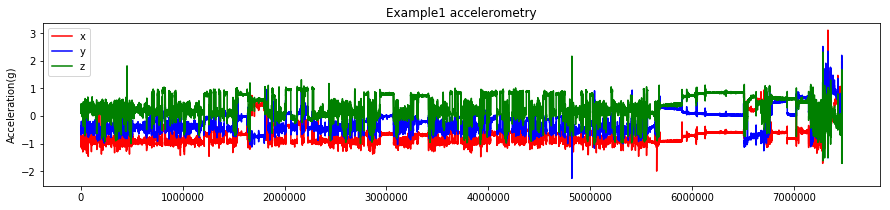

In [12]:
plot_measures(df1,"Example1 accelerometry")

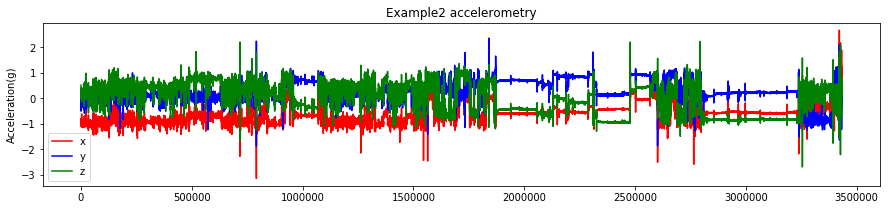

In [13]:
plot_measures(df2,"Example2 accelerometry")

## Finding initial patch placement during calibration 

According to the guidelines from Vital Connect resources:
    x direction is along vital patch device width, 
    y direction is along vital patch device length, 
    z direction is perpendicular to the device, towards the torso of the participant. 

While sitting and standing straight and being still, I will assume the only accelaration is along the gravity.
In this case z should be close to zero, and x and y would change with respect to device placement on the chest.

For **Position A** device is placed vertical on the sternum. Therefore y value should be highest.   
For **Position C** device is placed horizantally on lower left chest. Therefore x value should be highest.   
For **Position B** device is placed at 45 degree angle, I will assume x==y. 

While laying down(on a flat surface) highest accelaration reading should be in Z direction, with x and y being in the plane of torso there wont be any accelaration.

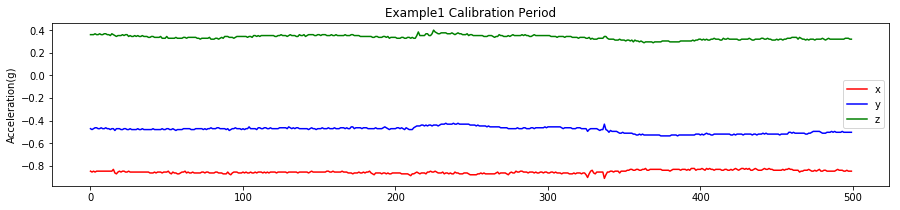

In [14]:
plot_measures(df1.iloc[0:500],'Example1 Calibration Period')

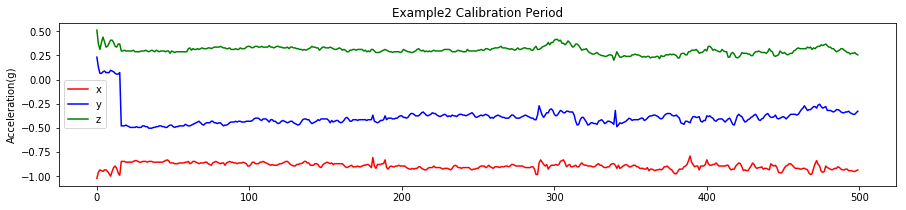

In [15]:
plot_measures(df2.iloc[0:500],'Example2 Calibration Period')

Both sensors have z<0.5, indicating that the participant was not laying down flat. Since abs(X) is greater than abs(Y) we can infer that both participants were set up with Position C, where device is placed horizantal on chest, and the gravity acceleration is highest in x direction( along the direction of device width) 

In [16]:
def sensor_position(sensor,dataset):
    x=sensor['accel_x'].abs().mean()
    y=sensor['accel_y'].abs().mean()
    z=sensor['accel_z'].abs().mean()
    
    if y> (x+0.1): 
        position='Position A: vertical' # device placed vertical
    elif x>(y+0.1):
        position='Position C:horizantal' # device placed horizantal
    else: 
        position='Position B:45degree angle' #devide placed at 45degree angle  
    
    return print('Vital Connect Patch Device was placed in {} for dataset {}.'.format(position,dataset))
    

In [17]:
sensor_position(df1.iloc[0:500],'Example1 in the beginning')
sensor_position(df2.iloc[0:500],'Example2 in the beginning')

Vital Connect Patch Device was placed in Position C:horizantal for dataset Example1 in the beginning.
Vital Connect Patch Device was placed in Position C:horizantal for dataset Example2 in the beginning.


## Identify patch location after re-attach at the end 

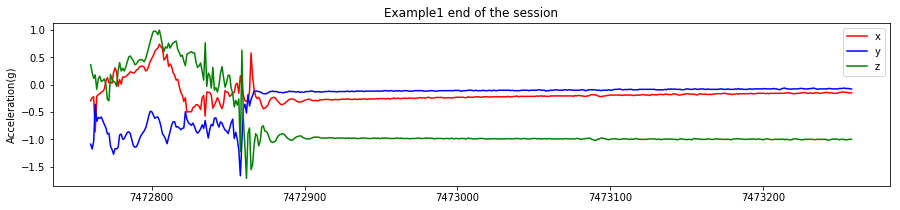

In [18]:
plot_measures(df1.iloc[-500:-1],'Example1 end of the session')

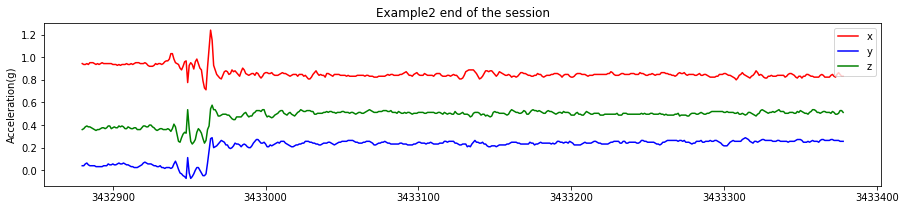

In [19]:
plot_measures(df2.iloc[-500:-1],'Example2 end of the session')

In [20]:
sensor_position(df1.iloc[-500:-1],'Example1 at the end')
sensor_position(df2.iloc[-500:-1],'Example2 at the end')

Vital Connect Patch Device was placed in Position B:45degree angle for dataset Example1 at the end.
Vital Connect Patch Device was placed in Position C:horizantal for dataset Example2 at the end.


## Identify if the patch is inversely placed

First, let's do a visual check of the device signals at the beginning and end of the session for Example 1 Dataset:

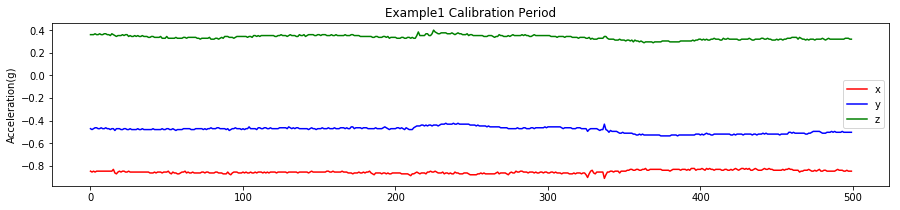

In [21]:
plot_measures(df1.iloc[0:500],'Example1 Calibration Period')

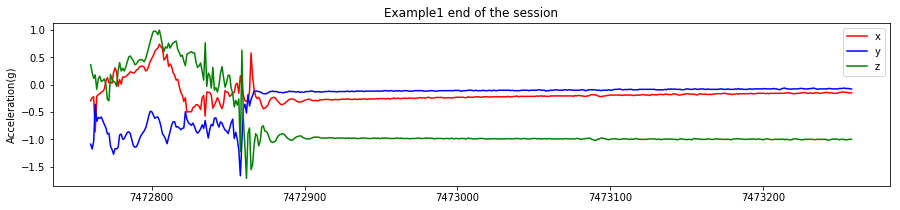

In [22]:
plot_measures(df1.iloc[-500:-1],'Example1 end of the session')

Z signal is the one going towards the participants torso. When laying down flat on a surface, z will be close to 1g. For this value to be negative, assuming the participant is not facing down, there must have been a change in polarity of the patch. 

In [23]:
def check_inversion(sensor,dataset):
    z=sensor['accel_z'][-200:-1].mean()
    if z < 0:
        print('Device was inversely placed for {} dataset.'.format(dataset))
    else:
        print('Device inversion was not detected for {} dataset.'.format(dataset))

In [24]:
check_inversion(df1,'Example1')
check_inversion(df2,'Example2')

Device was inversely placed for Example1 dataset.
Device inversion was not detected for Example2 dataset.


## (Optional): Derive step count 

Step count from accelerameter data is not an exact science. The existing studies in the literature can be categorized into time domain approaches, frequency domain approaches and feature clustering approaches. [Kang 2018](https://www.ncbi.nlm.nih.gov/pubmed/29351223) 

Here, I will adopt time domain peak detection approach. I will use **scipy.signal.find_peaks()** function to find peaks of acceleration magnitude over a certain threshold, and limit the interval between two peaks to reduce misjudgment. 

In [25]:
def count_steps(sensor,dataset):
    mag=sensor.magnitude
    # lets assume peaks should be 20 data points apart (20ms*20=400ms)
    # and at least 1.2g in magnitude 
    peaks, _ = find_peaks(mag, height=1.2, distance=20) 


    plt.figure(figsize=(15,3))
    plt.plot(mag)
    plt.plot(peaks, mag[peaks], "x",label='peaks')
    plt.plot(sensor['accel_z'], 'g',label='z') 
    plt.legend()
    plt.title(dataset)
    plt.show()
    print('Estimated number of steps for {} dataset: {}'.format(dataset,len(peaks)))

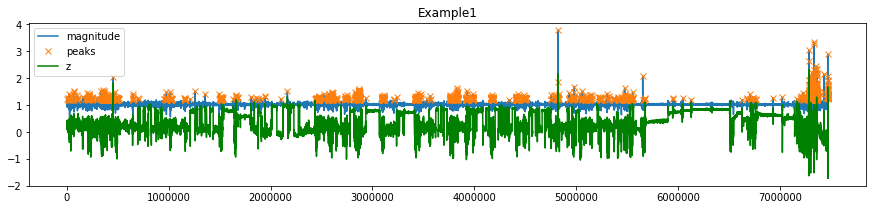

Estimated number of steps for Example1 dataset: 1758


In [26]:
count_steps(df1,"Example1")

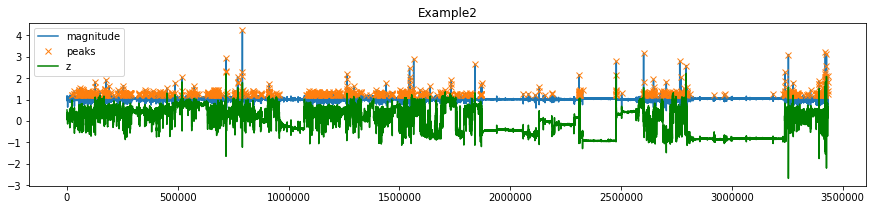

Estimated number of steps for Example2 dataset: 1113


In [27]:
count_steps(df2,"Example2")

## Other features and parameters that can be derived from accelerometer data

In addition to raw accelerometer values, we can analyze the time stamp to investigate if there were periods of signal loss. This may correspond to an event of reattachment. 

We could also develop algorithms to detect falls. One way to detect them could be after high acceration, sensor readings in z direction should indicate the patient laying down. Falls are actually pretty hazardous for the elderly with severe adverse outcomes, being able to detect fall emergency in real time would be useful. 

Another crude estimation could be sleep duration and sleep restlessness. This can be derived from longer periods of participant laying down, during sleep restless moments would cause peaks in overall magnitude. 

### Additional Exploration: Signal lapses

The lapses in sensor signal timestamp could be due bluetooth connectivity, or it may be an indication that patch is removed and reattached by caregivers or participants. 

Difference in time stamps can be calculated using pandas **pd.shift()** function, **pd.value_counts()** function will allow us to inspect the intervals. 

In [28]:
df1['Interval']=df1['Time']-df1['Time'].shift(1)
df1['Interval'].value_counts()

20.0         6776717
19.0          360183
21.0          329165
22.0            3828
18.0            2974
23.0             304
17.0              83
221.0              1
181.0              1
60.0               1
40.0               1
1246177.0          1
Name: Interval, dtype: int64

In [29]:
df2['Interval']=df2['Time']-df2['Time'].shift(1)
df2['Interval'].value_counts()

20.0          2609569
19.0           777662
18.0            19049
21.0            19011
17.0             8034
22.0               41
81356.0             1
9063.0              1
334466.0            1
11301.0             1
77144.0             1
13575.0             1
18017.0             1
20160.0             1
157.0               1
50429.0             1
54567.0             1
16214119.0          1
197669.0            1
Name: Interval, dtype: int64

This shows that most data points are 20ms(+/-3) apart, but there are some that are considerably longer for both example datasets. 

Let's print the accelerometer data around each signal lapse where the signal interval is larger than 30ms. 

In [30]:
lapses1=df1[df1['Interval']>30].index.tolist()
for lapse in lapses1:
    print(df1[['TS','accel_x','accel_y','accel_z']].iloc[lapse-3:lapse+3])

                             TS  accel_x  accel_y  accel_z
5376205 2017-09-09 01:46:31.531   -0.936   -0.400    0.232
5376206 2017-09-09 01:46:31.551   -0.936   -0.408    0.232
5376207 2017-09-09 01:46:31.571   -0.936   -0.400    0.240
5376208 2017-09-09 01:46:31.631   -0.944   -0.408    0.232
5376209 2017-09-09 01:46:31.651   -0.944   -0.408    0.256
5376210 2017-09-09 01:46:31.671   -0.944   -0.424    0.256
                             TS  accel_x  accel_y  accel_z
5474831 2017-09-09 02:19:23.725   -0.864   -0.552    0.304
5474832 2017-09-09 02:19:23.745   -0.848   -0.544    0.296
5474833 2017-09-09 02:19:23.765   -0.840   -0.536    0.288
5474834 2017-09-09 02:19:23.946   -0.872   -0.472    0.232
5474835 2017-09-09 02:19:23.966   -0.888   -0.472    0.224
5474836 2017-09-09 02:19:23.986   -0.928   -0.480    0.224
                             TS  accel_x  accel_y  accel_z
5503496 2017-09-09 02:28:57.226   -0.936   -0.432    0.072
5503497 2017-09-09 02:28:57.246   -0.936   -0.424    0.0

In [31]:
lapses2=df2[df2['Interval']>30].index.tolist()
for lapse in lapses2:
    print(df2[['TS','accel_x','accel_y','accel_z']].iloc[lapse-3:lapse+3])

                        TS  accel_x  accel_y  accel_z
13 2018-03-21 14:55:18.339   -0.920    0.056    0.336
14 2018-03-21 14:55:18.359   -0.968    0.056    0.368
15 2018-03-21 14:55:18.380   -0.992    0.072    0.368
16 2018-03-21 19:25:32.499   -0.848   -0.480    0.296
17 2018-03-21 19:25:32.519   -0.848   -0.480    0.296
18 2018-03-21 19:25:32.539   -0.848   -0.480    0.304
                             TS  accel_x  accel_y  accel_z
2793287 2018-03-22 10:45:25.331   -0.856    0.360    0.408
2793288 2018-03-22 10:45:25.351   -0.872    0.400    0.408
2793289 2018-03-22 10:45:25.371   -0.880    0.416    0.416
2793290 2018-03-22 10:45:45.531   -0.896    0.424    0.408
2793291 2018-03-22 10:45:45.551   -0.912    0.424    0.416
2793292 2018-03-22 10:45:45.571   -0.920    0.440    0.416
                             TS  accel_x  accel_y  accel_z
3241326 2018-03-22 13:13:24.025   -0.848   -0.464    0.344
3241327 2018-03-22 13:13:24.045   -0.856   -0.472    0.352
3241328 2018-03-22 13:13:24.065 

For df1=example1, accelaration values before and after the time lapse has same sign, For df2=example2 only change is during the calibration period. Therefore I wasnot able to use the data points where data sampling time was higher than usual as an indicator for patch reattachment. 